<a href="https://colab.research.google.com/github/adinsa1/Data110/blob/main/201Linear_Regression_2_(6)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
X = data # boston.data
X.shape

(506, 13)

In [ ]:
y = target # boston.target
y.shape

(506,)

In [ ]:
# print(boston.DESCR)

In [ ]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

We instantiate the linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [ ]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [ ]:
X_test.shape, y_test.shape

((152, 13), (152,))

We fit the training data to a linear model

In [ ]:
LinReg.fit(X_train, y_train)

LinearRegression()

We use the model to predict the test data

In [ ]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [ ]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

23.899298254147187


Let us use sklearn metrics next

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

23.899298254147187


What is the error on the training data

In [ ]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

22.185099943840463


In [ ]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [ ]:
LinReg.score(X_test, y_test)

0.6942001460999003

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([ 1.,  2.,  3., 20., 62., 39., 17.,  4.,  3.,  1.]),
 array([-19.65167904, -15.7843303 , -11.91698157,  -8.04963284,
         -4.18228411,  -0.31493538,   3.55241335,   7.41976208,
         11.28711081,  15.15445955,  19.02180828]),
 <BarContainer object of 10 artists>)

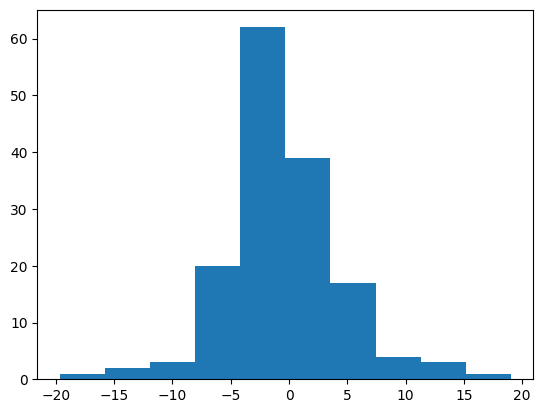

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

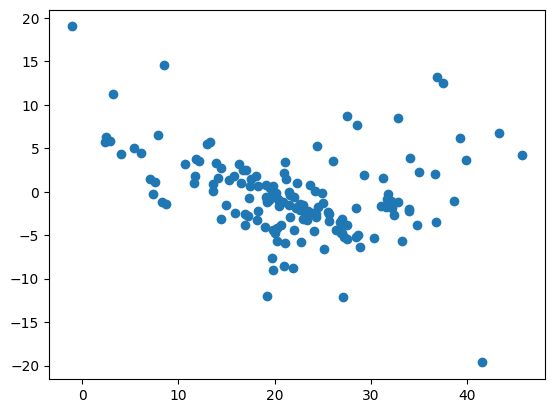

In [ ]:
plt.scatter(y_predicted, y_test - y_predicted)

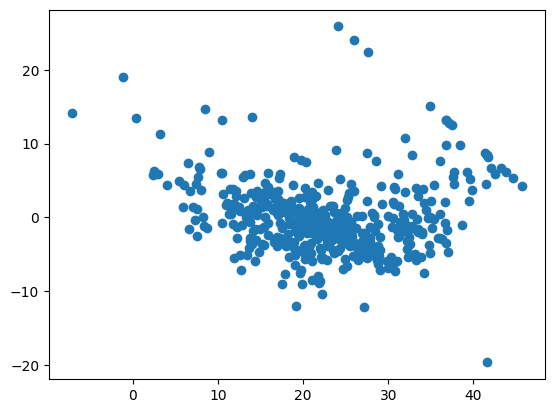

In [ ]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

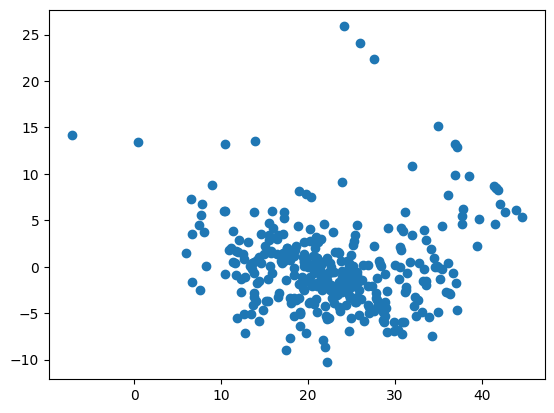

In [ ]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [ ]:
print(LinReg.coef_)


[-1.36433871e-01  4.56199492e-02 -1.07402687e-02  3.39429937e+00
 -1.39490478e+01  4.49967710e+00 -7.97639341e-03 -1.44241908e+00
  3.62981469e-01 -1.12308747e-02 -8.28516415e-01  1.61945828e-02
 -5.25652419e-01]


In [ ]:
print(LinReg.intercept_)

25.285808965689842
